<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](mlcourse.ai) – Open Machine Learning Course 

Author: [Yury Kashnitskiy](https://yorko.github.io). 
Translated and edited by [Maxim Keremet](https://www.linkedin.com/in/maximkeremet/), [Artem Trunov](https://www.linkedin.com/in/datamove/), and [Aditya Soni](https://www.linkedin.com/in/aditya-soni-0505a9124/). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center>Assignment #2. Fall 2018 <br> Exploratory Data Analysis (EDA) of US flights <br> (using Pandas, Matplotlib & Seaborn)

<img src='../../img/plane_sunset.png' width=50%>

Prior to working on the assignment, you'd better check out the corresponding course material:
 - [Visualization: from Simple Distributions to Dimensionality Reduction](https://mlcourse.ai/notebooks/blob/master/jupyter_english/topic02_visual_data_analysis/topic2_visual_data_analysis.ipynb?flush_cache=true)
 - [Overview of Seaborn, Matplotlib and Plotly libraries](https://mlcourse.ai/notebooks/blob/master/jupyter_english/topic02_visual_data_analysis/topic2_additional_seaborn_matplotlib_plotly.ipynb?flush_cache=true)
 - first lectures in [this](https://www.youtube.com/watch?v=QKTuw4PNOsU&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX) YouTube playlist 

### Your task is to:
 - write code and perform computations in the cells below
 - choose answers in the [webform](https://docs.google.com/forms/d/1qSTjLAGqsmpFRhacv0vM-CMQSTT_mtOalNXdRTcdtM0/edit)
 - submit answers with **the very same email and name** as in assignment 1. This is a part of the assignment, if you don't manage to do so, you won't get credits. If in doubt, you can re-submit A1 form till the deadline for A1, no problem
 
### <center> Deadline for A2: 2018 October 21, 20:59 CET



In [1]:
import numpy as np
import pandas as pd
# pip install seaborn 
import seaborn as sns
import matplotlib.pyplot as plt

* Download the data [archive](http://stat-computing.org/dataexpo/2009/2008.csv.bz2) (Archived ~ 114 Mb, unzipped - ~ 690 Mb). No need to unzip - pandas can unbzip on the fly.
* Place it in the "../../data" folder, or change the path below according to your location.
* The dataset has information about carriers and flights between US airports during the year 2008. 
* Column description is available [here](http://www.transtats.bts.gov/Fields.asp?Table_ID=236). Visit this site to find ex. meaning of flight cancellation codes.

**Reading data into memory and creating a Pandas _DataFrame_ object**

(This may take a while, be patient)

We are not going to read in the whole dataset. In order to reduce memory footprint, we instead load only needed columns and cast them suitable data types.

In [2]:
dtype = {'DayOfWeek': np.uint8, 'DayofMonth': np.uint8, 'Month': np.uint8 , 'Cancelled': np.uint8, 
         'Year': np.uint16, 'FlightNum': np.uint16 , 'Distance': np.uint16, 
         'UniqueCarrier': str, 'CancellationCode': str, 'Origin': str, 'Dest': str,
         'ArrDelay': np.float16, 'DepDelay': np.float16, 'CarrierDelay': np.float16,
         'WeatherDelay': np.float16, 'NASDelay': np.float16, 'SecurityDelay': np.float16,
         'LateAircraftDelay': np.float16, 'DepTime': np.float16}

In [3]:
%%time
# change the path if needed
path = '2008.csv.bz2'
flights_df = pd.read_csv(path, usecols=dtype.keys(), dtype=dtype)

CPU times: user 39.1 s, sys: 336 ms, total: 39.5 s
Wall time: 39.7 s


**Check the number of rows and columns and print column names.**

In [4]:
print(flights_df.shape)
print(flights_df.columns)

(7009728, 19)
Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


**Print first 5 rows of the dataset.**

In [5]:
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,BWI,515,0,NaN,2.0,0.0,0.0,0.0,32.0


**Transpose the frame to see all features at once.**

In [8]:
flights_df.head().T

,0,1,2,3,4
Year,2008,2008,2008,2008,2008
Month,1,1,1,1,1
DayofMonth,3,3,3,3,3
DayOfWeek,4,4,4,4,4
DepTime,2003,754,628,926,1829
UniqueCarrier,WN,WN,WN,WN,WN
FlightNum,335,3231,448,1746,3920
ArrDelay,-14,2,14,-6,34
DepDelay,8,19,8,-4,34
Origin,IAD,IAD,IND,IND,IND


**Examine data types of all features and total dataframe size in memory.**

In [9]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 19 columns):
Year                 uint16
Month                uint8
DayofMonth           uint8
DayOfWeek            uint8
DepTime              float16
UniqueCarrier        object
FlightNum            uint16
ArrDelay             float16
DepDelay             float16
Origin               object
Dest                 object
Distance             uint16
Cancelled            uint8
CancellationCode     object
CarrierDelay         float16
WeatherDelay         float16
NASDelay             float16
SecurityDelay        float16
LateAircraftDelay    float16
dtypes: float16(8), object(4), uint16(3), uint8(4)
memory usage: 387.7+ MB


**Get basic statistics of each feature.**

In [10]:
flights_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7009728.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,7009728.0,6.375130,3.406737,1.0,3.0,6.0,9.0,12.0
DayofMonth,7009728.0,15.728015,8.797068,1.0,8.0,16.0,23.0,31.0
DayOfWeek,7009728.0,3.924182,1.988259,1.0,2.0,4.0,6.0,7.0
DepTime,6873482.0,NaN,NaN,1.0,928.0,1325.0,1728.0,2400.0
FlightNum,7009728.0,2224.200105,1961.715999,1.0,622.0,1571.0,3518.0,9743.0
ArrDelay,6855029.0,NaN,NaN,-519.0,-10.0,-2.0,12.0,2460.0
DepDelay,6873482.0,NaN,NaN,-534.0,-4.0,-1.0,8.0,2468.0
Distance,7009728.0,726.387029,562.101803,11.0,325.0,581.0,954.0,4962.0
Cancelled,7009728.0,0.019606,0.138643,0.0,0.0,0.0,0.0,1.0


**Count unique Carriers and plot their relative share of flights:**

In [9]:
flights_df['UniqueCarrier'].nunique()

20

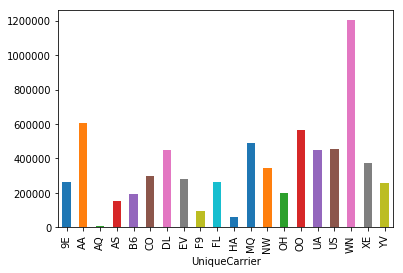

In [10]:
flights_df.groupby('UniqueCarrier').size().plot(kind='bar');

**We can also _group by_ category/categories in order to calculate different aggregated statistics.**

**For example, finding top-3 flight codes, that have the largest total distance travelled in year 2008.**

In [11]:
flights_df.groupby(['UniqueCarrier','FlightNum'])['Distance'].sum().sort_values(ascending=False).iloc[:3]

UniqueCarrier  FlightNum
CO             15           1796244.0
               14           1796244.0
UA             52           1789722.0
Name: Distance, dtype: float64

**Another way:**

In [12]:
flights_df.groupby(['UniqueCarrier','FlightNum'])\
  .agg({'Distance': [np.mean, np.sum, 'count'],
        'Cancelled': np.sum})\
  .sort_values(('Distance', 'sum'), ascending=False)\
  .iloc[0:3]

Distance                  Cancelled
                                mean        sum count       sum
UniqueCarrier FlightNum                                        
CO            15         4962.000000  1796244.0   362         0
              14         4962.000000  1796244.0   362         0
UA            52         2465.181818  1789722.0   726         8

**Number of flights by days of week and months:**

In [13]:
pd.crosstab(flights_df.Month, flights_df.DayOfWeek)

DayOfWeek,1,2,3,4,5,6,7
Month,,,,,,,
1,80807,97298,100080,102043,81940,67178,76419
2,81504,79700,80587,82158,102726,66462,76099
3,103210,81159,82307,82831,82936,86153,97494
4,82463,100785,102586,82799,82964,68304,78225
5,80626,79884,81264,102572,102878,84493,74576
6,104168,82160,82902,83617,83930,72322,99566
7,84095,103429,103315,105035,79349,72219,80489
8,82983,80895,81773,82625,103878,86155,93970
9,94300,91533,74057,75589,75881,58343,71205


**It can also be handy to color such tables in order to easily notice outliers:**

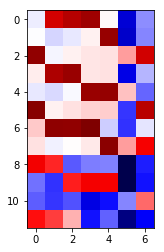

In [14]:
plt.imshow(pd.crosstab(flights_df.Month, flights_df.DayOfWeek),
           cmap='seismic', interpolation='none');

**Flight distance histogram:**

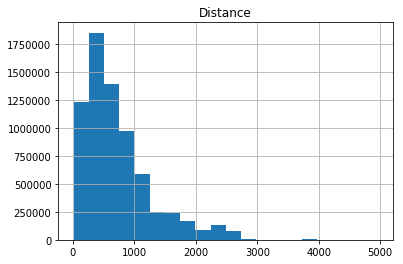

In [15]:
flights_df.hist('Distance', bins=20);

**Making a histogram of flight frequency by date.**

In [4]:
flights_df['Date'] = pd.to_datetime(flights_df.rename(columns={'DayofMonth': 'Day'})[['Year', 'Month', 'Day']])

In [5]:
flights_df

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,BWI,515,0,NaN,2.0,0.0,0.0,0.0,32.0,2008-01-03
5,2008,1,3,4,1940.0,WN,378,11.0,25.0,IND,JAX,688,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
6,2008,1,3,4,1937.0,WN,509,57.0,67.0,IND,LAS,1591,0,NaN,10.0,0.0,0.0,0.0,47.0,2008-01-03
7,2008,1,3,4,1039.0,WN,535,-18.0,-1.0,IND,LAS,1591,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
8,2008,1,3,4,617.0,WN,11,2.0,2.0,IND,MCI,451,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
9,2008,1,3,4,1620.0,WN,810,-16.0,0.0,IND,MCI,451,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03


In [6]:
num_flights_by_date = flights_df.groupby('Date').size()

In [7]:
num_flights_by_date

Date
2008-01-01    19187
2008-01-02    20954
2008-01-03    20937
2008-01-04    20929
2008-01-05    18069
2008-01-06    19897
2008-01-07    20347
2008-01-08    19604
2008-01-09    19820
2008-01-10    20305
2008-01-11    20349
2008-01-12    16572
2008-01-13    18947
2008-01-14    20178
2008-01-15    19504
2008-01-16    19768
2008-01-17    20277
2008-01-18    20348
2008-01-19    16255
2008-01-20    18653
2008-01-21    20133
2008-01-22    19505
2008-01-23    19771
2008-01-24    20258
2008-01-25    20314
2008-01-26    16282
2008-01-27    18922
2008-01-28    20149
2008-01-29    19498
2008-01-30    19767
              ...  
2008-12-02    18166
2008-12-03    18019
2008-12-04    18350
2008-12-05    18405
2008-12-06    14440
2008-12-07    17116
2008-12-08    18301
2008-12-09    17600
2008-12-10    17917
2008-12-11    18377
2008-12-12    18433
2008-12-13    14459
2008-12-14    17137
2008-12-15    18317
2008-12-16    17631
2008-12-17    18294
2008-12-18    18746
2008-12-19    18828
2008-12-20    1

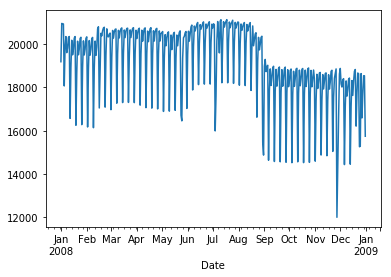

In [8]:
num_flights_by_date.plot();

**Do you see a weekly pattern above? And below?**

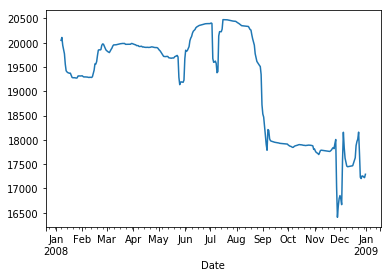

In [19]:
num_flights_by_date.rolling(window=7).mean().plot();

**1. Find top-10 carriers in terms of the number of completed flights (_UniqueCarrier_ column)?**

**Which of the listed below is _not_ in your top-10 list?**
- DL
- AA
- OO
- EV 

In [36]:
# You code here
top_10 = flights_df.loc[flights_df.Cancelled == 0].groupby(['UniqueCarrier'])\
  .size().reset_index(name='count').sort_values('count', ascending=False)[:10].values
print(top_10)
for i in ['DL', 'AA', 'OO',  'EV']:
    if i not in top_10:
        print(i)


[['WN' 1189365]
 ['AA' 587445]
 ['OO' 554723]
 ['MQ' 472362]
 ['US' 447007]
 ['DL' 445118]
 ['UA' 438974]
 ['XE' 364518]
 ['NW' 344746]
 ['CO' 294753]]
EV


**2. Plot distributions of flight cancellation reasons (_CancellationCode_).**

**What is the most frequent reason for flight cancellation? (Use this [link](https://www.transtats.bts.gov/Fields.asp?Table_ID=236) to translate codes into reasons)**
- carrier
- weather conditions 
- National Air System
- security reasons

In [37]:
# You code here
print(flights_df.CancellationCode.value_counts())
print("B Weather")

B    54904
A    54330
C    28188
D       12
Name: CancellationCode, dtype: int64
B Weather


**3. Which route is the most frequent, in terms of the number of flights?**

(Take a look at _'Origin'_ and _'Dest'_ features. Consider _A->B_ and _B->A_ directions as _different_ routes) 

 - New-York – Washington
 - San-Francisco – Los-Angeles 
 - San-Jose – Dallas
 - New-York – San-Francisco

In [60]:
# You code here
(flights_df['Origin'] + " " + flights_df['Dest']).value_counts().keys()[0]

'SFO LAX'

**4. Find top-5 delayed routes (count how many times they were delayed on departure). From all flights on these 5 routes, count all flights with weather conditions contributing to a delay.**

- 449 
- 539 
- 549 
- 668 

In [20]:

tmp_flights_df = flights_df.copy()
top_delay_routes = tmp_flights_df.loc[tmp_flights_df.DepDelay.notnull() & (tmp_flights_df.DepDelay > 0)].groupby(["Origin", "Dest"]).size().reset_index(name='count').sort_values('count', ascending=False)[:5]
# tmp_df = flights_df.groupby(["UniqueCarrier", "Origin", "Dest", "DepDelay"]).agg({'DepDelay': np.sum(summ)}).sort_values(('DepDelay'), ascending=False).add_suffix('_Count').reset_index()
# print(tmp_df[["Origin", "Dest"]].values)
# top_origin = [tuple(i)[0] for i in tmp_df[["Origin"]].values[:5]]
# tmp_df
# top_dest = [tuple(i)[0] for i in tmp_df[["Dest"]].values[:5]]

In [26]:
top_origin = [(i[0] +" "+ i[1]) for i in top_delay_routes.values]
top_origin

['LAX SFO', 'DAL HOU', 'SFO LAX', 'ORD LGA', 'HOU DAL']

In [27]:
tmp_flights_df = flights_df.copy()
tmp_flights_df["Orign_Dest"] = (flights_df.Origin + " " + flights_df.Dest)
tmp_flights_df
tmp_flights_df.loc[(tmp_flights_df.WeatherDelay.notnull()) & (tmp_flights_df.WeatherDelay > 0.0) & tmp_flights_df['Orign_Dest'].isin(top_origin)].reset_index()

,index,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,...,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Orign_Dest
0,402,2008,1,3,4,2008.0,WN,646,129.0,123.0,...,SFO,337,0,NaN,0.0,24.0,6.0,0.0,99.0,LAX SFO
1,3841,2008,1,4,5,1440.0,WN,680,236.0,230.0,...,SFO,337,0,NaN,0.0,202.0,6.0,0.0,28.0,LAX SFO
2,5334,2008,1,4,5,1946.0,WN,442,113.0,101.0,...,LAX,337,0,NaN,0.0,70.0,12.0,0.0,31.0,SFO LAX
3,7014,2008,1,5,6,1604.0,WN,656,93.0,94.0,...,SFO,337,0,NaN,0.0,93.0,0.0,0.0,0.0,LAX SFO
4,7016,2008,1,5,6,1533.0,WN,776,156.0,168.0,...,SFO,337,0,NaN,0.0,150.0,0.0,0.0,6.0,LAX SFO
5,9998,2008,1,6,7,1549.0,WN,656,76.0,79.0,...,SFO,337,0,NaN,0.0,48.0,0.0,0.0,28.0,LAX SFO
6,16748,2008,1,8,2,2220.0,WN,593,148.0,146.0,...,SFO,337,0,NaN,0.0,29.0,2.0,0.0,117.0,LAX SFO
7,27062,2008,1,11,5,1207.0,WN,680,79.0,77.0,...,SFO,337,0,NaN,0.0,77.0,2.0,0.0,0.0,LAX SFO
8,42690,2008,1,16,3,2204.0,WN,62,28.0,34.0,...,DAL,239,0,NaN,0.0,2.0,0.0,0.0,26.0,HOU DAL
9,49548,2008,1,18,5,2144.0,WN,60,35.0,43.0,...,DAL,239,0,NaN,0.0,17.0,0.0,0.0,18.0,HOU DAL


In [28]:
print(668)

668


**5. Examine the hourly distribution of departure times. For that, create a new series from DepTime, removing missing values.**

**Choose all correct statements:**
 - Flights are normally distributed within time interval [0-23] (Search for: Normal distribution, bell curve).
 - Flights are uniformly distributed within time interval [0-23].
 - In the period from 0 am to 4 am there are considerably less flights than from 7 pm to 8 pm.

In [6]:
# You code here
tmp_flights = flights_df.copy()
tmp_flights["m_h"] = pd.to_datetime(flights_df.DepTime, unit='m').dt.strftime('%H')

sort_values(as‌​cending=False)


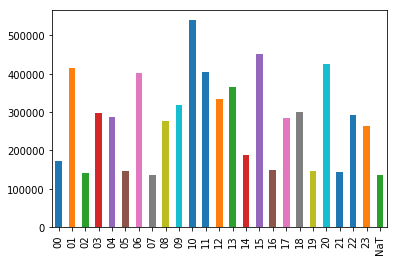

In [20]:
tmp_flights.m_h.value_counts().sort_index().plot(kind='bar')
print("sort_values(as‌​cending=False)")

**6. Show how the number of flights changes through time (on the daily/weekly/monthly basis) and interpret the findings.**

**Choose all correct statements:**
- The number of flights during weekends is less than during weekdays (working days).
- The lowest number of flights is on Sunday.
- There are less flights during winter than during summer.  

In [9]:
tmp_flights_df = flights_df.copy()
tmp_flights_df['Date'] = pd.to_datetime(flights_df.rename(columns={'DayofMonth': 'Day'})[['Year', 'Month', 'Day']])

In [42]:
summmm = tmp_flights_df.groupby("Month").size().values
print("S", summmm[1] + summmm[2] + summmm[11])
print("W", sum(summmm[5 : 8]))

S 1730284
W 1848875


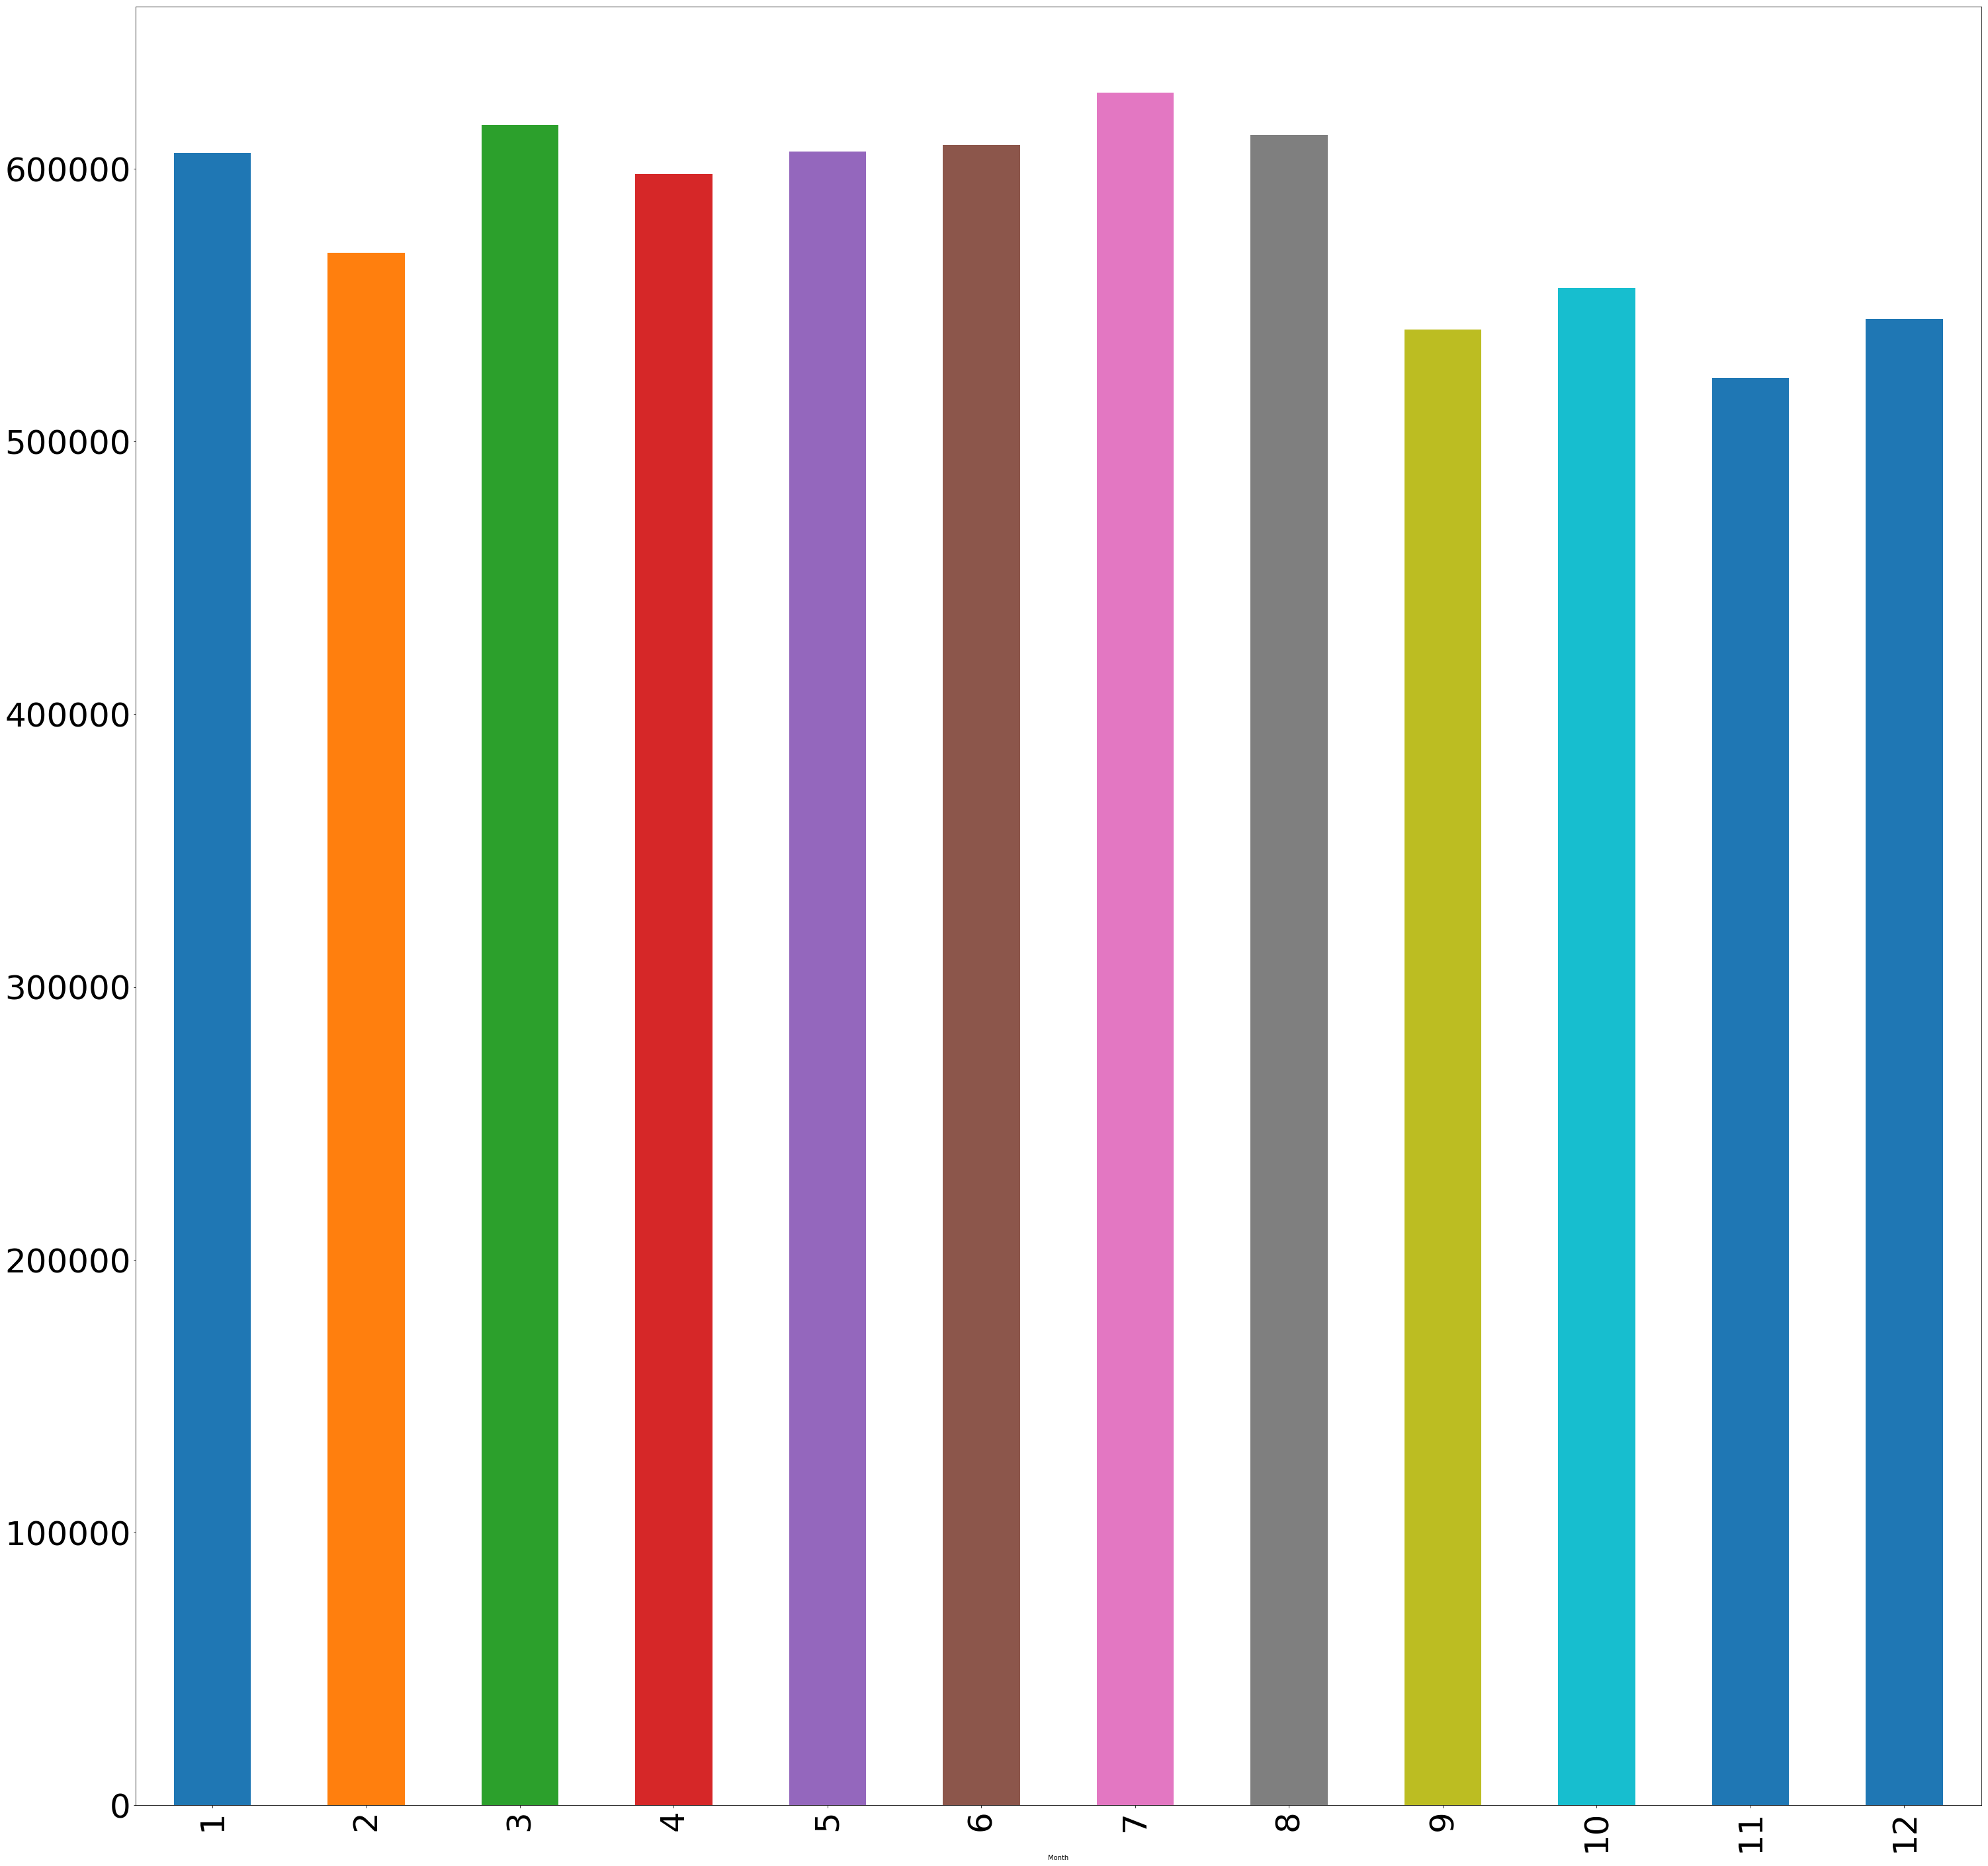

In [35]:
tmp_flights_df.groupby("Month").size().plot(figsize=(50, 50), fontsize=50, kind="bar" )

In [33]:
num_flights_by_date.plot(figsize=(50, 50), fontsize=50, kind="bar")

(2008, 1, 2)

In [23]:
tmp_flights_df["week"] = tmp_flights_df.Date.map(lambda x: x.isocalendar()[1])
tmp_flights_df

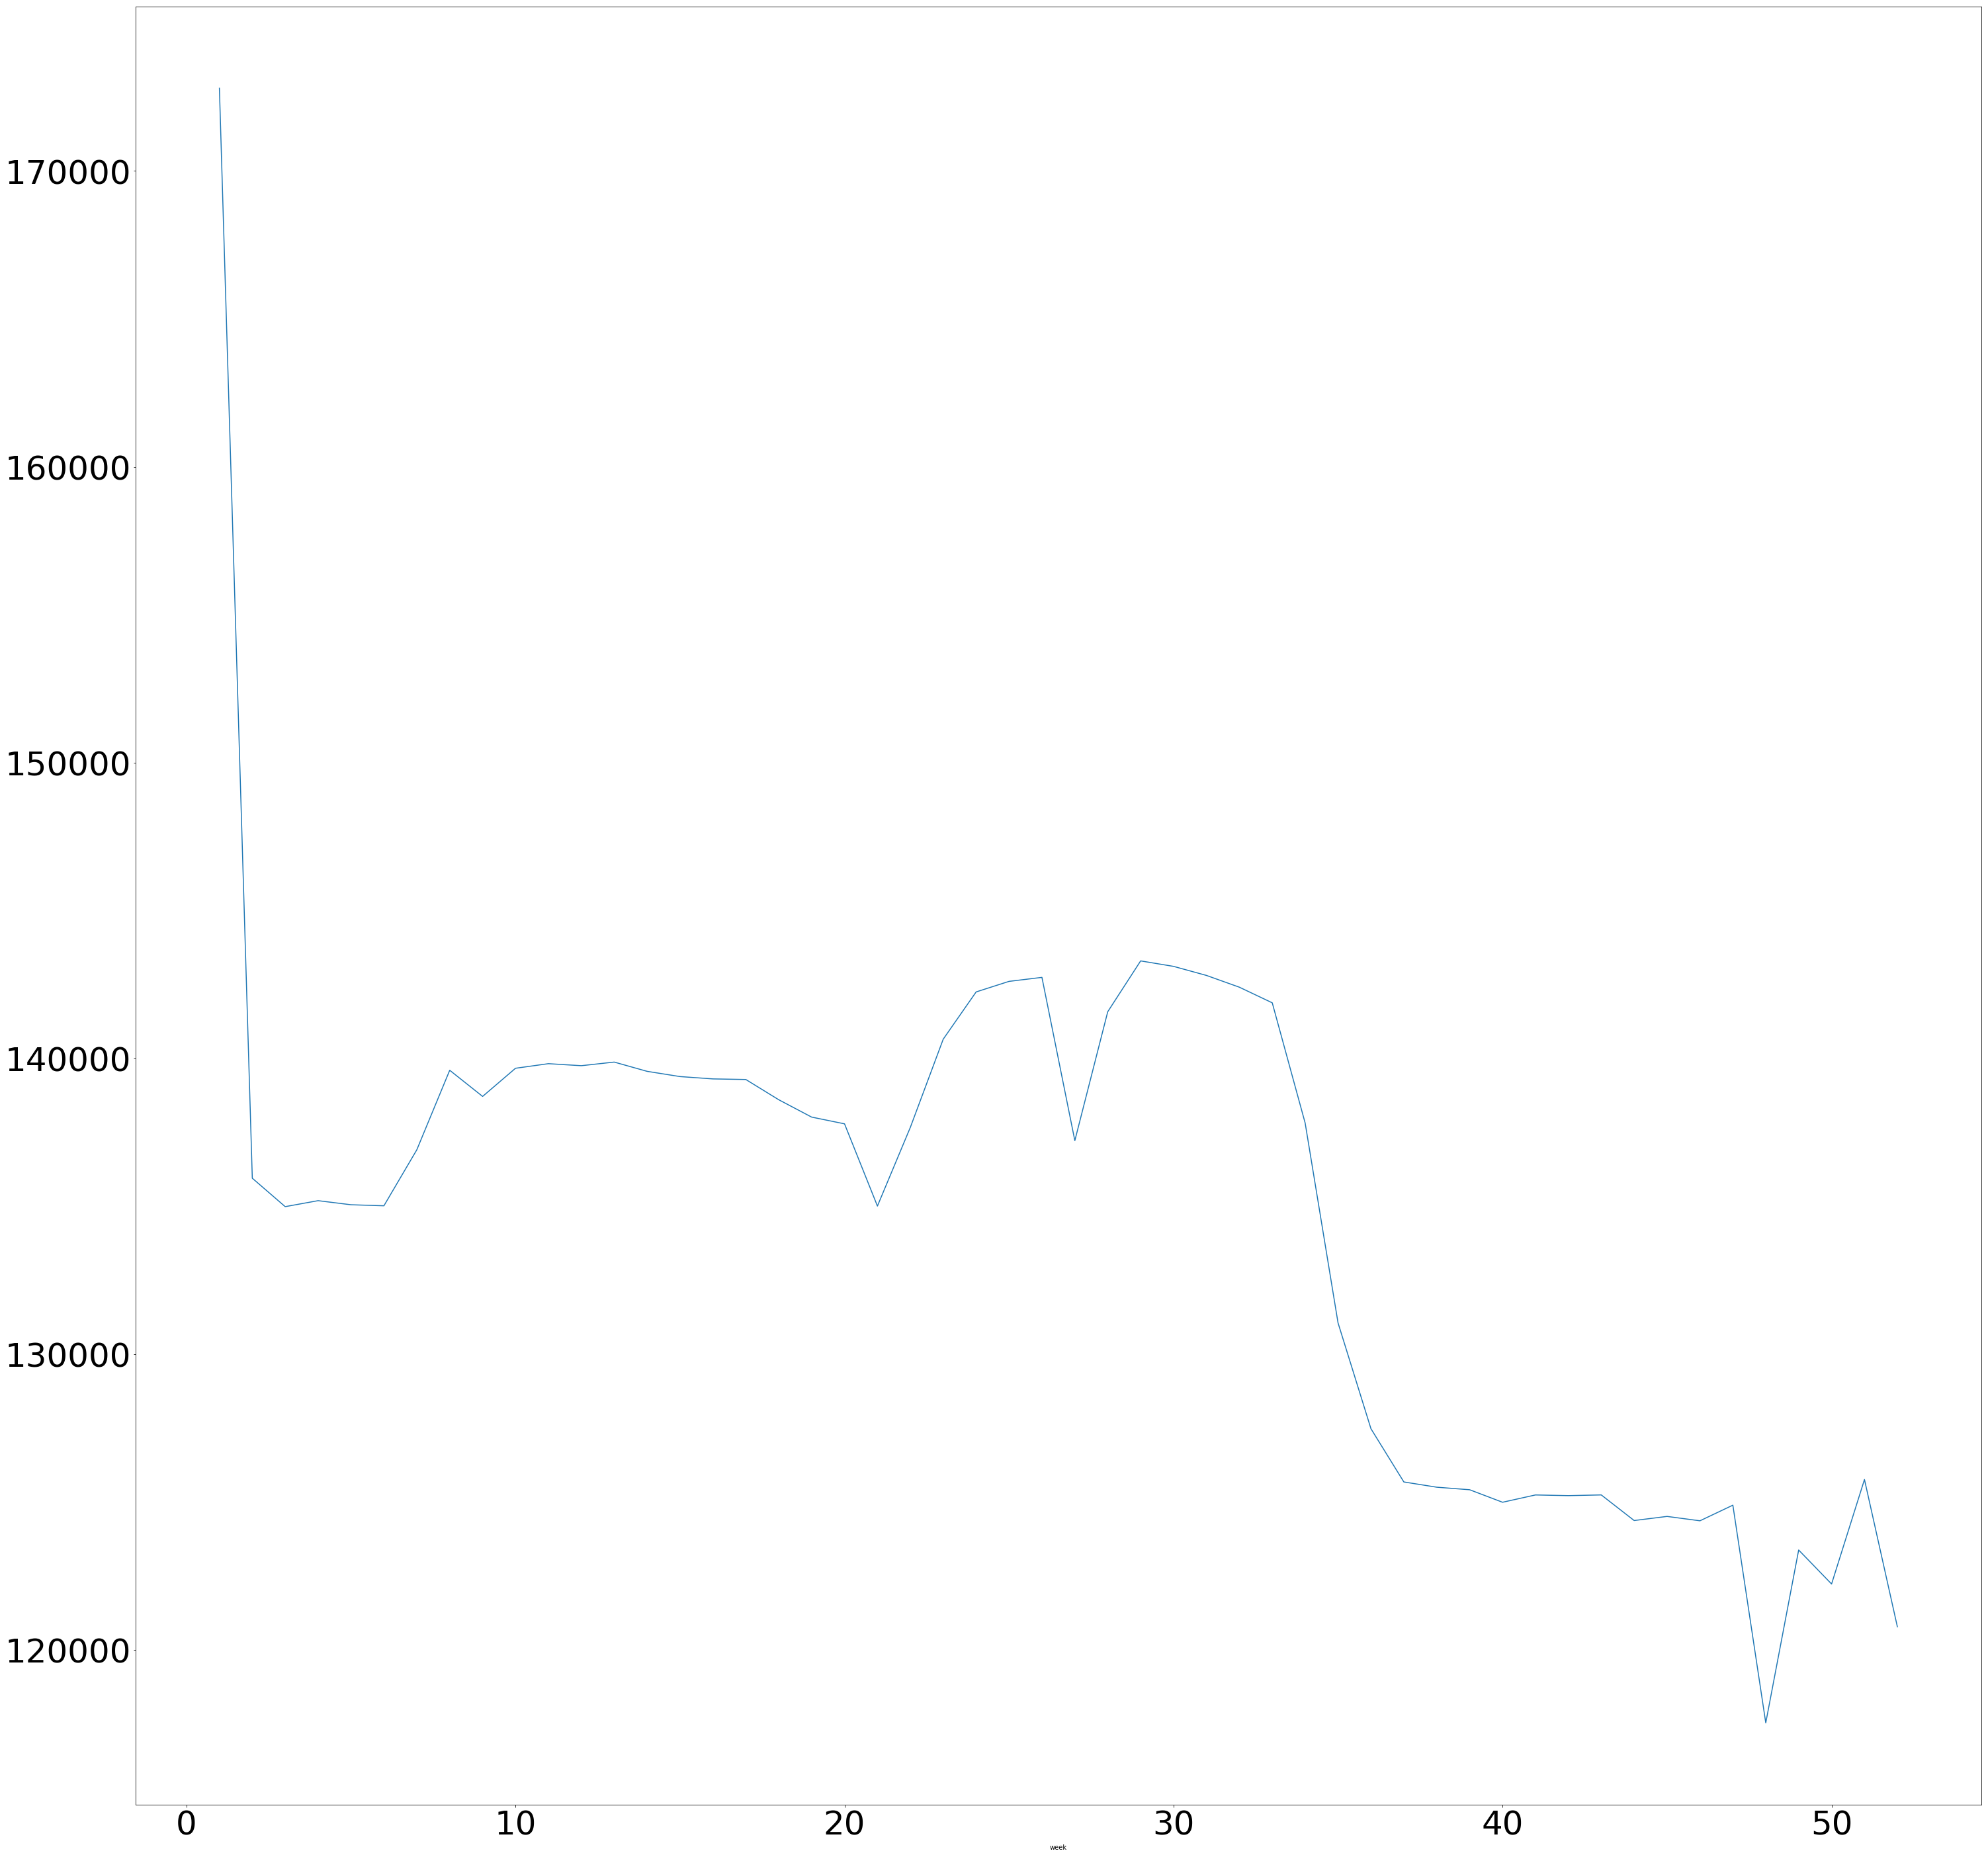

In [27]:
# You code here
tmp_flights_df.groupby("week").size().plot(figsize=(50, 50), fontsize=50)

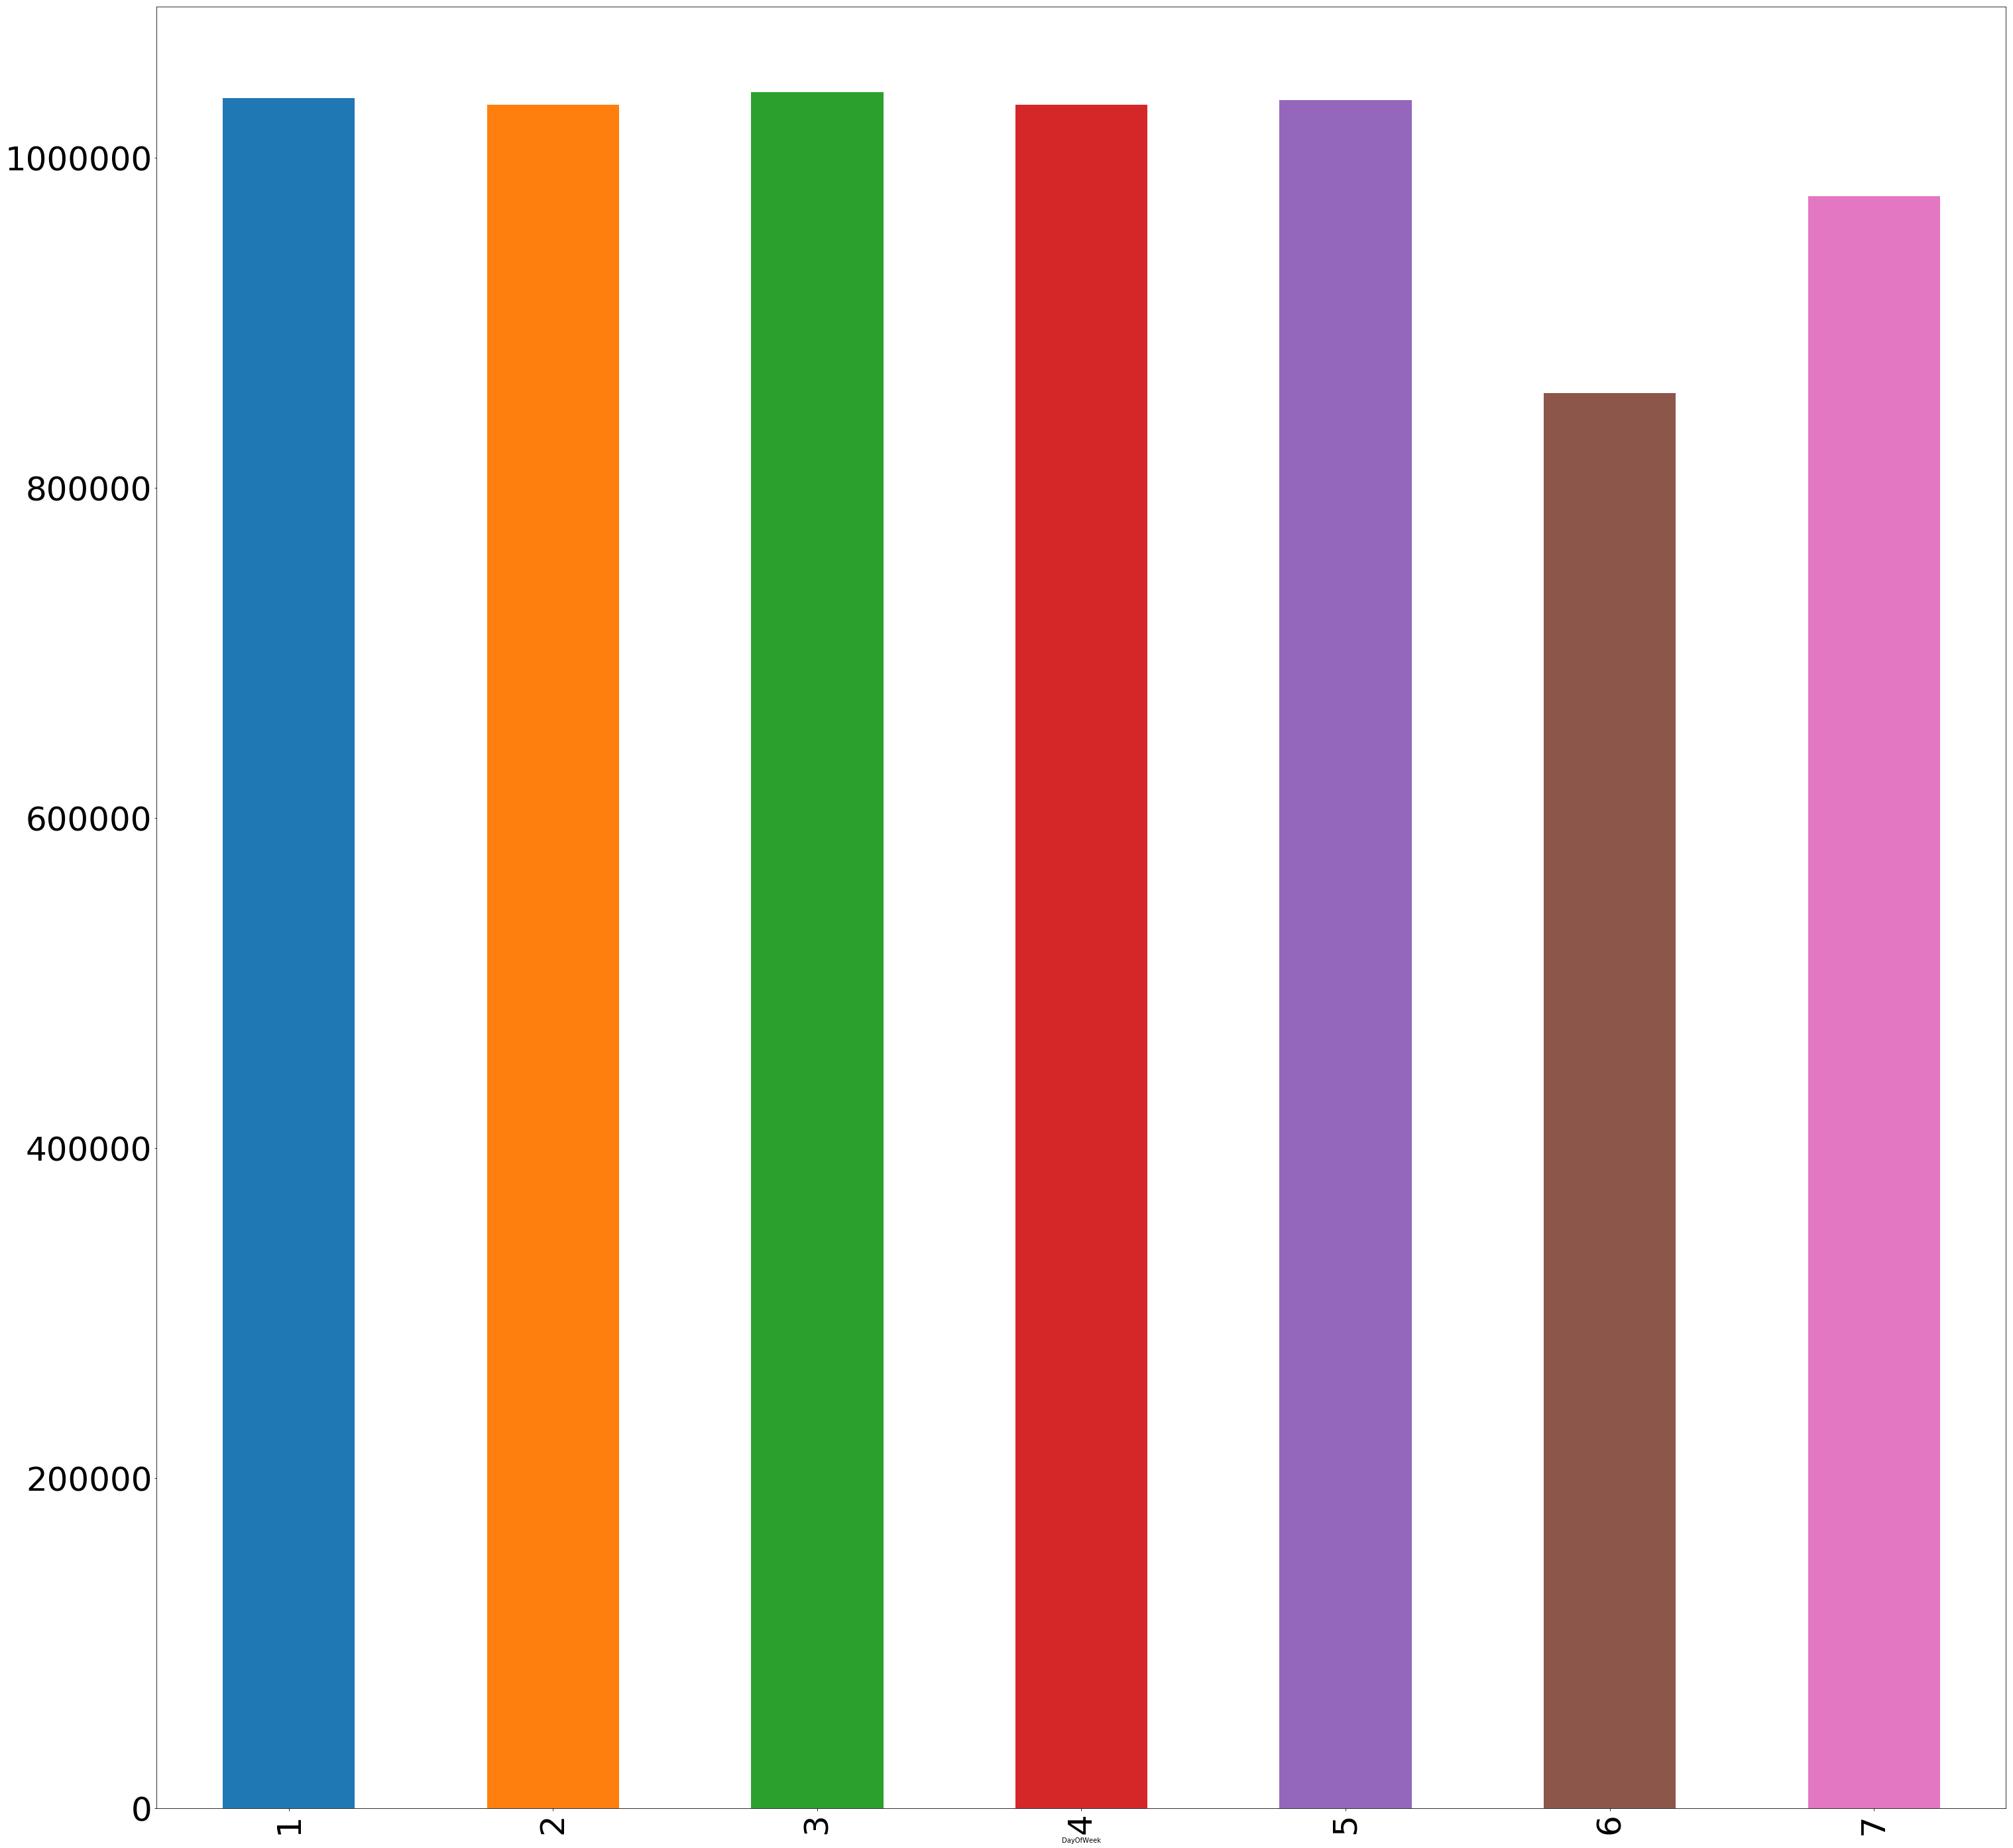

In [36]:
tmp_flights_df.groupby("DayOfWeek").size().plot(figsize=(50, 50), fontsize=50, kind="bar" )

In [37]:
print("The number of flights during weekends is less than during weekdays (working days).")

The number of flights during weekends is less than during weekdays (working days).


**7. Examine the distribution of cancellation reasons with time. Make a bar plot of cancellation reasons aggregated by months.**

**Choose all correct statements:**
- December has the highest rate of cancellations due to weather. 
- The highest rate of cancellations in September is due to Security reasons.
- April's top cancellation reason is carriers.
- Flights cancellations due to National Air System are more frequent than those due to carriers.

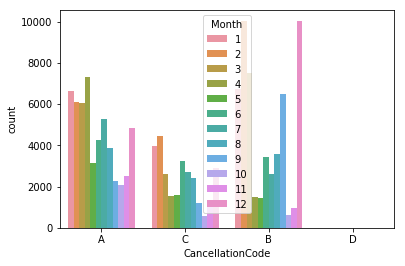

In [53]:
sns.countplot(x='CancellationCode', hue='Month', data=flights_df, );

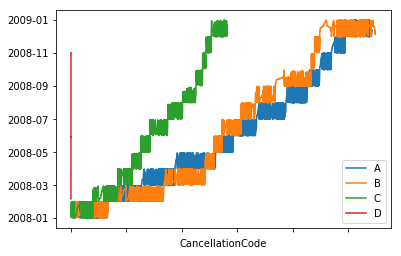

In [58]:
fig, ax = plt.subplots()

for key, data in flights_df.groupby('CancellationCode'):
    data.plot(x='CancellationCode', y='Date', ax=ax, label=key)


In [ ]:
print('December has the highest rate of cancellations due to weather.')
print('April's top cancellation reason is carriers.')

**8. Which month has the greatest number of cancellations due to Carrier?** 
- May
- January
- September
- April 

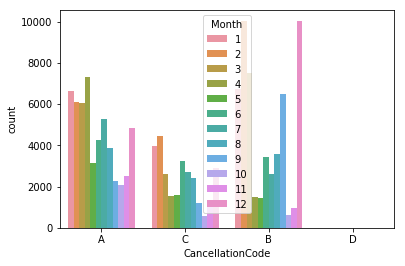

In [59]:
# You code here
sns.countplot(x='CancellationCode', hue='Month', data=flights_df, );

In [60]:
print("April")

April


**9. Identify the carrier with the greatest number of cancellations due to carrier in the corresponding month from the previous question.**

- 9E
- EV
- HA
- AA

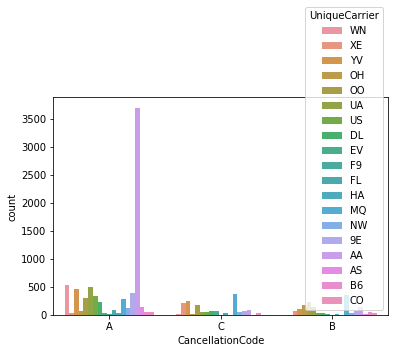

In [70]:
# You code here
# sns.countplot(x='CancellationCode', hue='Month', data=flights_df, y='UniqueCarrier');
# data.groupby(['date','type']).count()['amount'].plot(ax=ax)
# fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(x='CancellationCode', hue='UniqueCarrier', data=flights_df.loc[flights_df.Month == 4]);

# flights_df.loc[flights_df.Month == 4]
# flights_df.groupby(['Month', 'UniqueCarrier']).count()['Month'].plot(ax=ax, kind="bar")

In [71]:
print("AA")

AA


**10. Examine median arrival and departure delays (in time) by carrier. Which carrier has the lowest median delay time for both arrivals and departures? Leave only non-negative values of delay times ('ArrDelay', 'DepDelay').
[Boxplots](https://seaborn.pydata.org/generated/seaborn.boxplot.html) can be helpful in this exercise, as well as it might be a good idea to remove outliers in order to build nice graphs. You can exclude delay time values higher than a corresponding .95 percentile.**

- EV
- OO
- AA
- AQ 

In [7]:
# You code here
tmp_flights_df = flights_df[(flights_df.ArrDelay > 0) & (flights_df.DepDelay > 0)].copy()

tmp_flights_df["arr_dep"] =  tmp_flights_df.ArrDelay + tmp_flights_df.DepDelay




count    2049000.0
mean           NaN
std            NaN
min            2.0
25%           20.0
50%           45.0
75%          102.0
max         4920.0
Name: arr_dep, dtype: float64

In [20]:
tmp_flights_df.groupby("UniqueCarrier")[['arr_dep']].median().sort_values("arr_dep")

,arr_dep
UniqueCarrier,
AQ,18.0
HA,20.0
F9,29.0
WN,34.0
AS,39.0
DL,39.0
US,41.0
CO,42.0
FL,43.0


In [22]:
print("AQ")

AQ
